# Campaña de Marketing Bancario - EDA

In [48]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Problem statement and data collection

In [3]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 2. Exploration and data cleaning
# 2.1 Understanding the features:

- 'age'- Edad del cliente -> n
- 'job'- Tipo de trabajo -> c
- 'marital'- Estado civil -> c
- 'education'- Nivel de educación -> c
- 'default'- ¿Tiene crédito actualmente? -> c
- 'housing'- ¿Tiene un préstamo de vivienda? -> c
- 'loan'- ¿Tiene un préstamo personal? -> c
- 'contact'- Tipo de comunicación de contacto -> c
- 'month'- Último mes en el que se le ha contactado -> c
- 'day_of_week' - Último día en el que se le ha contactado -> c
- 'duration'- Duración del contacto previo en segundos -> n
- 'campaign'- Número de contactos realizados durante esta campaña al cliente -> n
- 'pdays'- Número de días que transcurrieron desde la última campaña hasta que fue contactado -> n
- 'previous'- Número de contactos realizados durante la campaña anterior al cliente -> n
- 'poutcome'- Resultado de la campaña de marketing anterior -> c
- 'emp.var.rate'- Tasa de variación del empleo. Indicador trimestral -> n
- 'cons.price.idx'- Índice de precios al consumidor. Indicador mensual -> n
- 'cons.conf.idx'- Índice de confianza del consumidor. Indicador mensual -> n
- 'euribor3m' - Tasa EURIBOR 3 meses. Indicador diario -> n
- 'nr.employed' - Número de empleados. Indicador trimestral -> n
- 'y'. TARGET - El cliente contrata un depósito a largo plazo o no -> c

* n - numerical / c - categorical

In [4]:
# Obtener las dimensiones
print('Our dataframe contains {} rows, indicating the total number of rentals, and has a shape of {}.'.format(len(total_data), total_data.shape))

Our dataframe contains 41188 rows, indicating the total number of rentals, and has a shape of (41188, 21).


In [5]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 2.2 Identifying Null Values and data types for each feature

In [6]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

Conclusions:
- We don't have any Nan values 

# 2.3 Looking for duplicated and dropping them, if any.

In [7]:
#Eliminamos los duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 2.4 Eliminating Irrelevant Information and dealing with null values

In [8]:
#Eliminar información irrelevante
total_data.drop(["previous", "contact", "month", "day_of_week", "duration"], axis = 1, inplace = True)
total_data.head(3)

,age,job,marital,education,default,housing,loan,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 3. Univariate Analysis
# 3.1 Dividing our dataset into categorial and numerical.

In [9]:
#Analizamos los tipos de información que tenemos
total_data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [10]:
#Dividimos el datafram original por valores numéricos y categóricos
num = ['int64', 'float64']
cat = ['O']

df_num = total_data.select_dtypes(num)
df_cat = total_data.select_dtypes(cat)

In [11]:
df_cat.head(3)

,job,marital,education,default,housing,loan,poutcome,y
0,housemaid,married,basic.4y,no,no,no,nonexistent,no
1,services,married,high.school,unknown,no,no,nonexistent,no
2,services,married,high.school,no,yes,no,nonexistent,no


# 3.2 Categorical Variable Analysis

/tmp/ipykernel_601/1298408679.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_601/1298408679.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


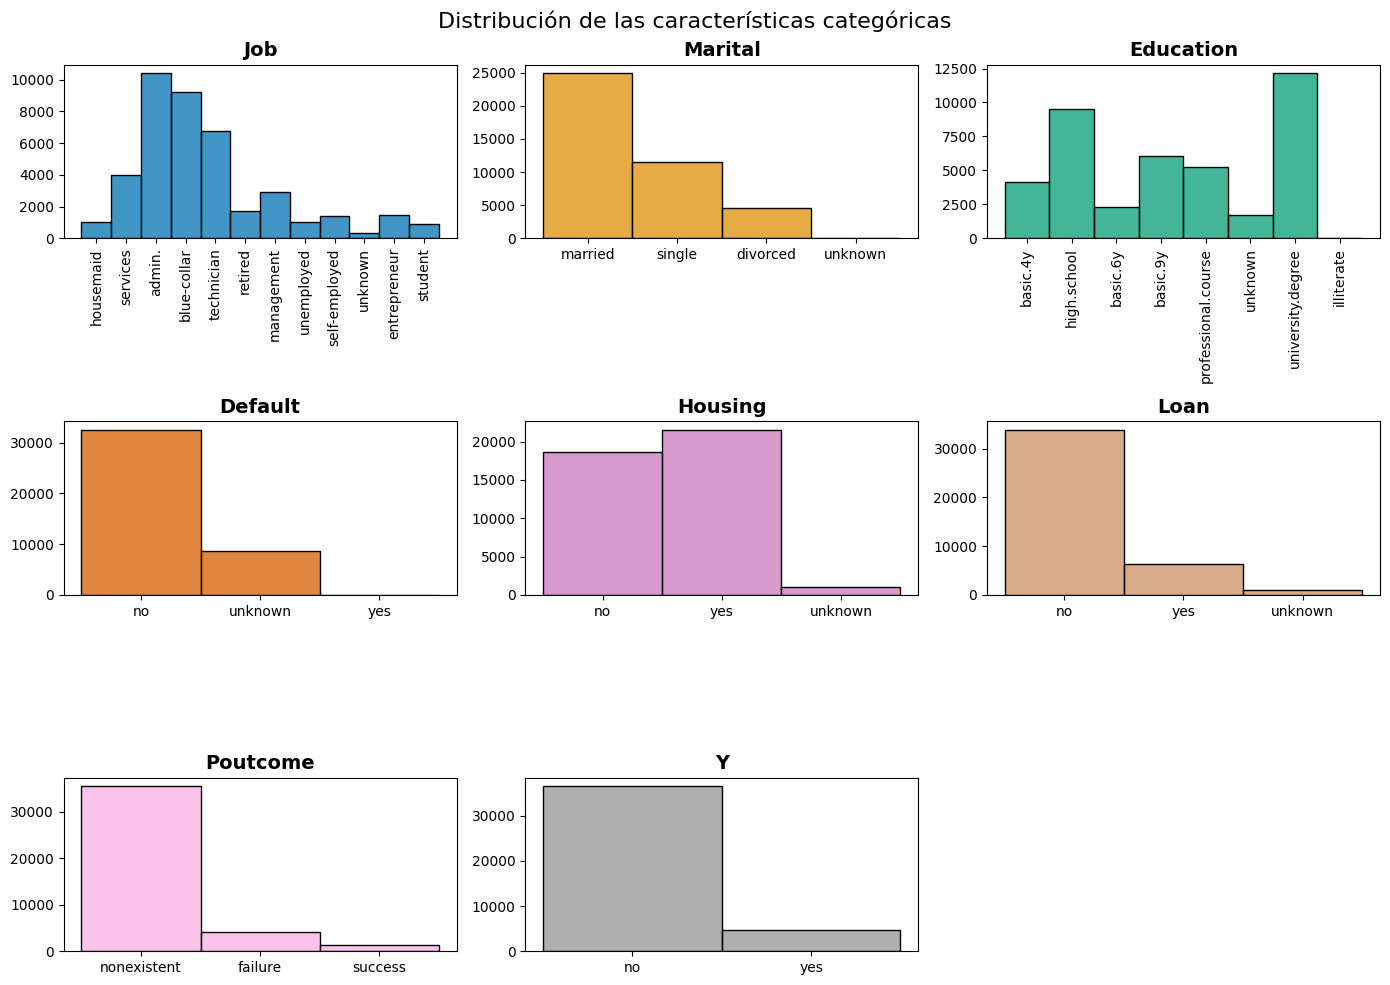

In [12]:
fig, axis = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle("Distribución de las características categóricas", fontsize=16)

categorias = [
    ("job", 0, 0),
    ("marital", 0, 1),
    ("education", 0, 2),
    ("default", 1, 0),
    ("housing", 1, 1),
    ("loan", 1,2),
    ("poutcome", 2,0),
    ("y", 2, 1),
]
colores = sns.color_palette("colorblind")

for i, (col, row, col_pos) in enumerate(categorias):
    ax = axis[row, col_pos]
    sns.histplot(data=df_cat, x=col, ax=ax, color=colores[i]).set(xlabel=None, ylabel=None)
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=14, fontweight='bold')
    
    if col in ["job", "education"]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.show()

#Analisis

# 3.3 Numerical Variable Analysis

In [13]:
df_num.head(3)

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,1.1,93.994,-36.4,4.857,5191.0


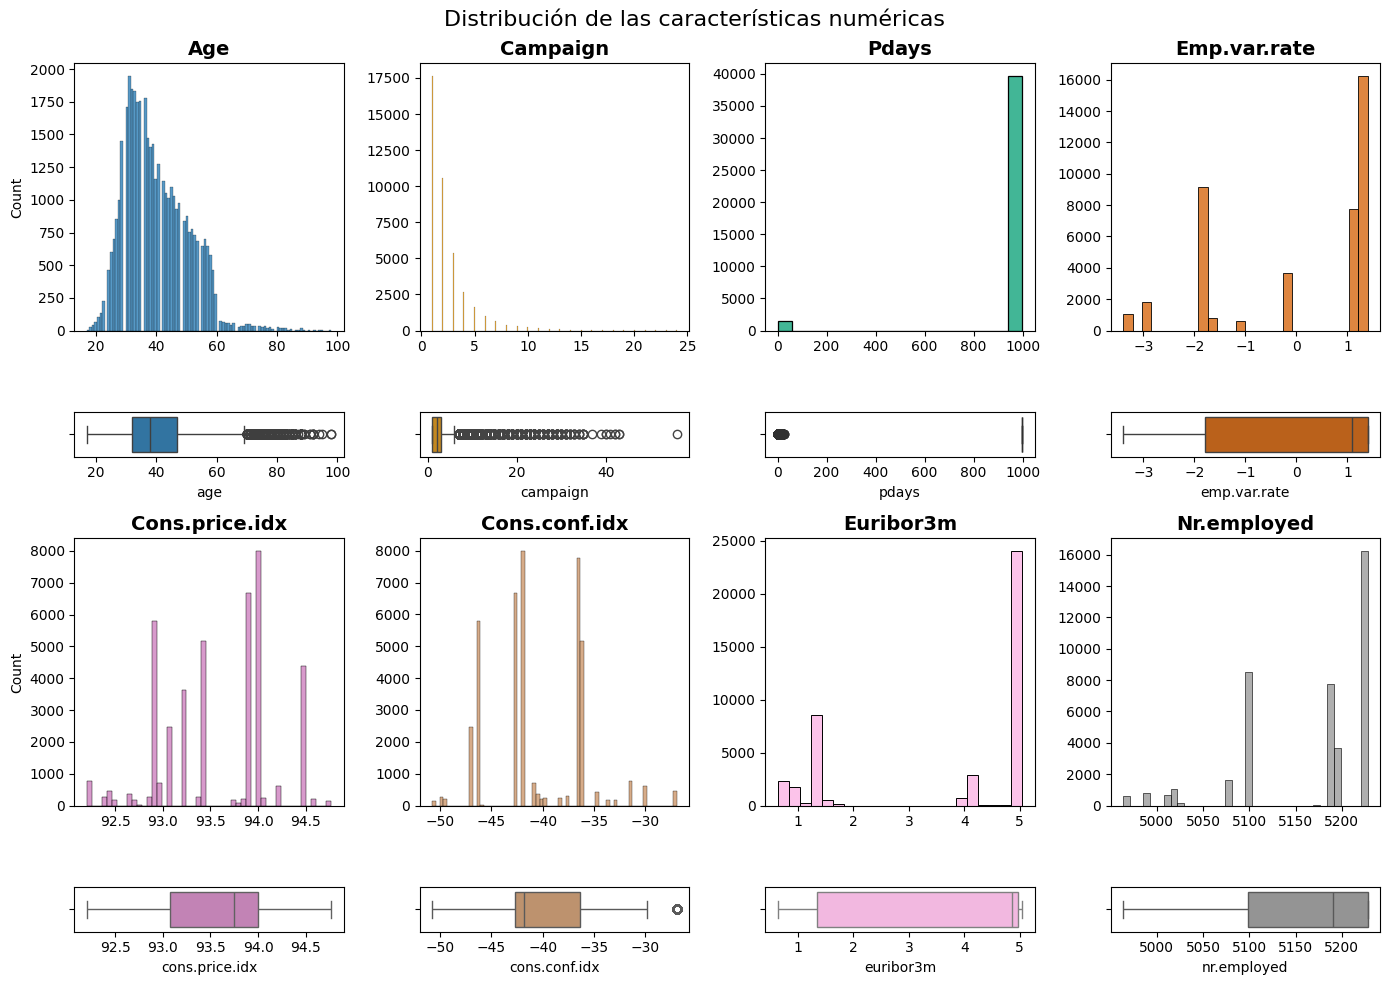

In [14]:
#Analisis con histogramas y boxplot de las características numéricas
fig, axis = plt.subplots(4, 4, figsize = (14, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = df_num, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_num, x = "age")

sns.histplot(ax = axis[0, 1], data = df_num[df_num["campaign"] < 25], x = "campaign", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_num, x = "campaign", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = df_num, x = "pdays", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df_num, x = "pdays", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = df_num, x = "emp.var.rate", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df_num, x = "emp.var.rate", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 0], data = df_num, x = "cons.price.idx", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df_num, x = "cons.price.idx", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 1], data = df_num, x = "cons.conf.idx", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df_num, x = "cons.conf.idx", color=sns.color_palette("colorblind")[5])

sns.histplot(ax = axis[2, 2], data = df_num, x = "euribor3m", color=sns.color_palette("colorblind")[6]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = df_num, x = "euribor3m", color=sns.color_palette("colorblind")[6])

sns.histplot(ax = axis[2, 3], data = df_num, x = "nr.employed", color=sns.color_palette("colorblind")[7]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = df_num, x = "nr.employed", color=sns.color_palette("colorblind")[7])

axis[0, 0].set_title("Age", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Campaign", fontsize=14, fontweight='bold')
axis[0, 2].set_title("Pdays", fontsize=14, fontweight='bold')
axis[0, 3].set_title("Emp.var.rate", fontsize=14, fontweight='bold')
axis[2, 0].set_title("Cons.price.idx", fontsize=14, fontweight='bold')
axis[2, 1].set_title("Cons.conf.idx", fontsize=14, fontweight='bold')
axis[2, 2].set_title("Euribor3m", fontsize=14, fontweight='bold')
axis[2, 3].set_title("Nr.employed", fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

#Analisis

# 4. Multivariate Analysis

/tmp/ipykernel_601/636096319.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=90, fontsize=8)
/tmp/ipykernel_601/636096319.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=90, fontsize=8)


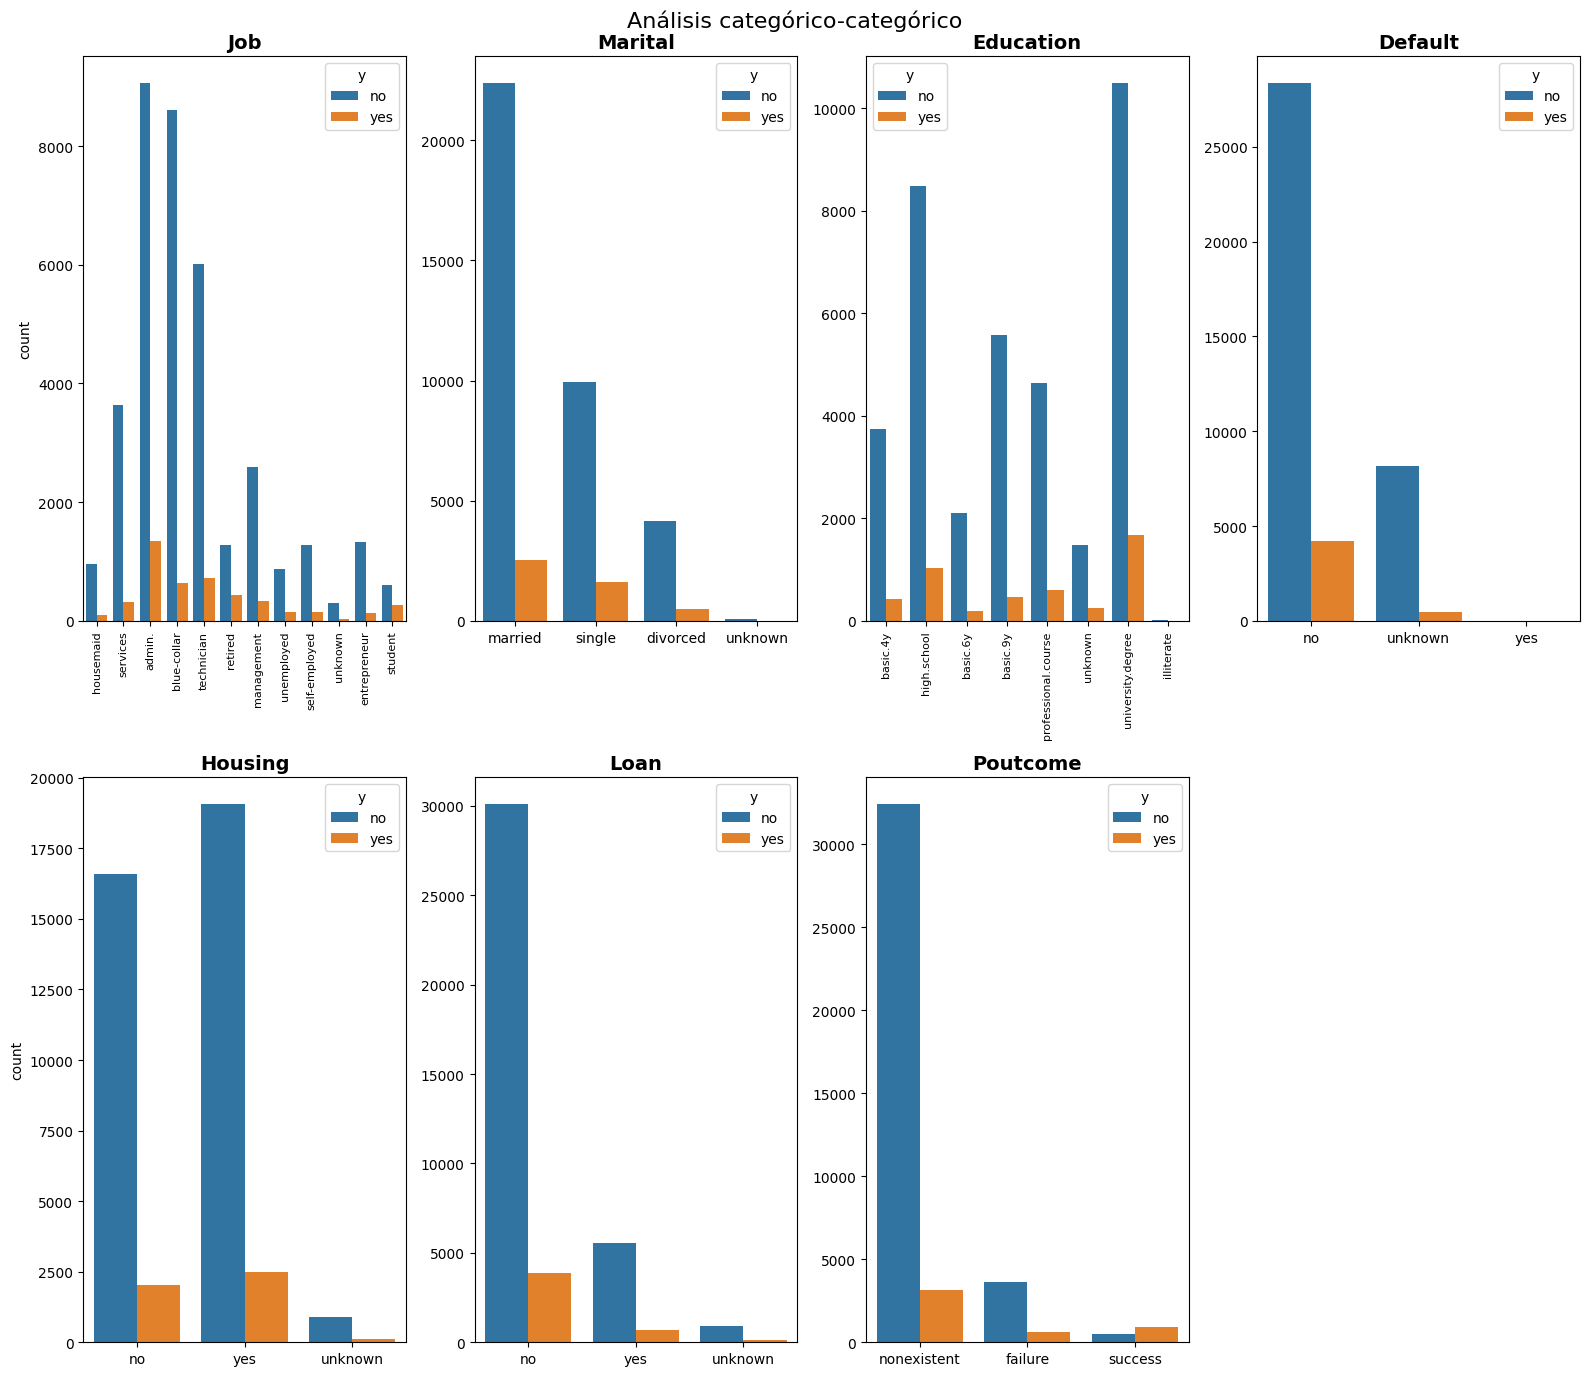

In [15]:
#Analisis de varias variables, pt.2

fig, axis = plt.subplots(2, 4, figsize = (16, 14))
fig.suptitle("Análisis categórico-categórico", fontsize=16)

sns.countplot(ax = axis[0, 0], data = total_data, x="job", hue = "y").set(xlabel= None)
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=90, fontsize=8)
sns.countplot(ax = axis[0, 1], data = total_data, x="marital", hue = "y").set(xlabel= None, ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x="education", hue = "y").set(xlabel= None, ylabel = None)
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=90, fontsize=8)
sns.countplot(ax = axis[0, 3], data = total_data, x="default", hue = "y").set(xlabel= None, ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x="housing", hue = "y").set(xlabel= None)
sns.countplot(ax = axis[1, 1], data = total_data, x="loan", hue = "y").set(xlabel= None, ylabel = None)
sns.countplot(ax = axis[1, 2], data = total_data, x="poutcome", hue = "y").set(xlabel= None, ylabel = None)

axis[0, 0].set_title("Job", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Marital", fontsize=14, fontweight='bold')
axis[0, 2].set_title("Education", fontsize=14, fontweight='bold')
axis[0, 3].set_title("Default", fontsize=14, fontweight='bold')
axis[1, 0].set_title("Housing", fontsize=14, fontweight='bold')
axis[1, 1].set_title("Loan", fontsize=14, fontweight='bold')
axis[1, 2].set_title("Poutcome", fontsize=14, fontweight='bold')

fig.delaxes(axis[1, 3])

plt.tight_layout()
plt.show()


#Analisis

# 4.1 Encoding Categorical Values and Saving JSON files

In [16]:
os.makedirs('./enc', exist_ok=True)

j = list(total_data['job'].unique())
job_encoded = dict(zip(j, list(range(len(j)))))

with open('./enc/job_encoded.json', 'w') as f:
    json.dump(job_encoded, f)

In [17]:
m = list(total_data['marital'].unique())
marital_encoded = dict(zip(m, list(range(len(m)))))

with open('./enc/marital_encoded.json', 'w') as f:
    json.dump(marital_encoded, f)

In [18]:
e = list(total_data['education'].unique())
education_encoded = dict(zip(e, list(range(len(e)))))

with open('./enc/education_encoded.json', 'w') as f:
    json.dump(education_encoded, f)

In [19]:
d = list(total_data['default'].unique())
default_encoded = dict(zip(d, list(range(len(d)))))

with open('./enc/default_encoded.json', 'w') as f:
    json.dump(default_encoded, f)

In [20]:
h = list(total_data['housing'].unique())
housing_encoded = dict(zip(h, list(range(len(h)))))

with open('./enc/housing_encoded.json', 'w') as f:
    json.dump(housing_encoded, f)

In [21]:
l = list(total_data['loan'].unique())
loan_encoded = dict(zip(l, list(range(len(l)))))

with open('./enc/loan_encoded.json', 'w') as f:
    json.dump(loan_encoded, f)

In [22]:
p = list(total_data['poutcome'].unique())
poutcome_encoded = dict(zip(p, list(range(len(p)))))

with open('./enc/poutcome_encoded.json', 'w') as f:
    json.dump(poutcome_encoded, f)

In [23]:
yn = list(total_data['y'].unique())
y_encoded = dict(zip(yn, list(range(len(yn)))))

with open('./enc/y_encoded.json', 'w') as f:
    json.dump(y_encoded, f)

In [24]:
#Hacemos una copia del data frame con outliers
df_enc = total_data.copy()

In [25]:
df_enc['job_encoded'] = df_enc['job'].map(job_encoded)
df_enc['marital_encoded'] = df_enc['marital'].map(marital_encoded)
df_enc['education_encoded'] = df_enc['education'].map(education_encoded)
df_enc['default_encoded'] = df_enc['default'].map(default_encoded)
df_enc['housing_encoded'] = df_enc['housing'].map(housing_encoded)
df_enc['loan_encoded'] = df_enc['loan'].map(loan_encoded)
df_enc['poutcome_encoded'] = df_enc['poutcome'].map(poutcome_encoded)
df_enc['y_encoded'] = df_enc['y'].map(y_encoded)
df_enc.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y'], inplace=True)
df_enc.head(3)

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,poutcome_encoded,y_encoded
0,56,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0
1,57,1,999,1.1,93.994,-36.4,4.857,5191.0,1,0,1,1,0,0,0,0
2,37,1,999,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,1,0,0,0


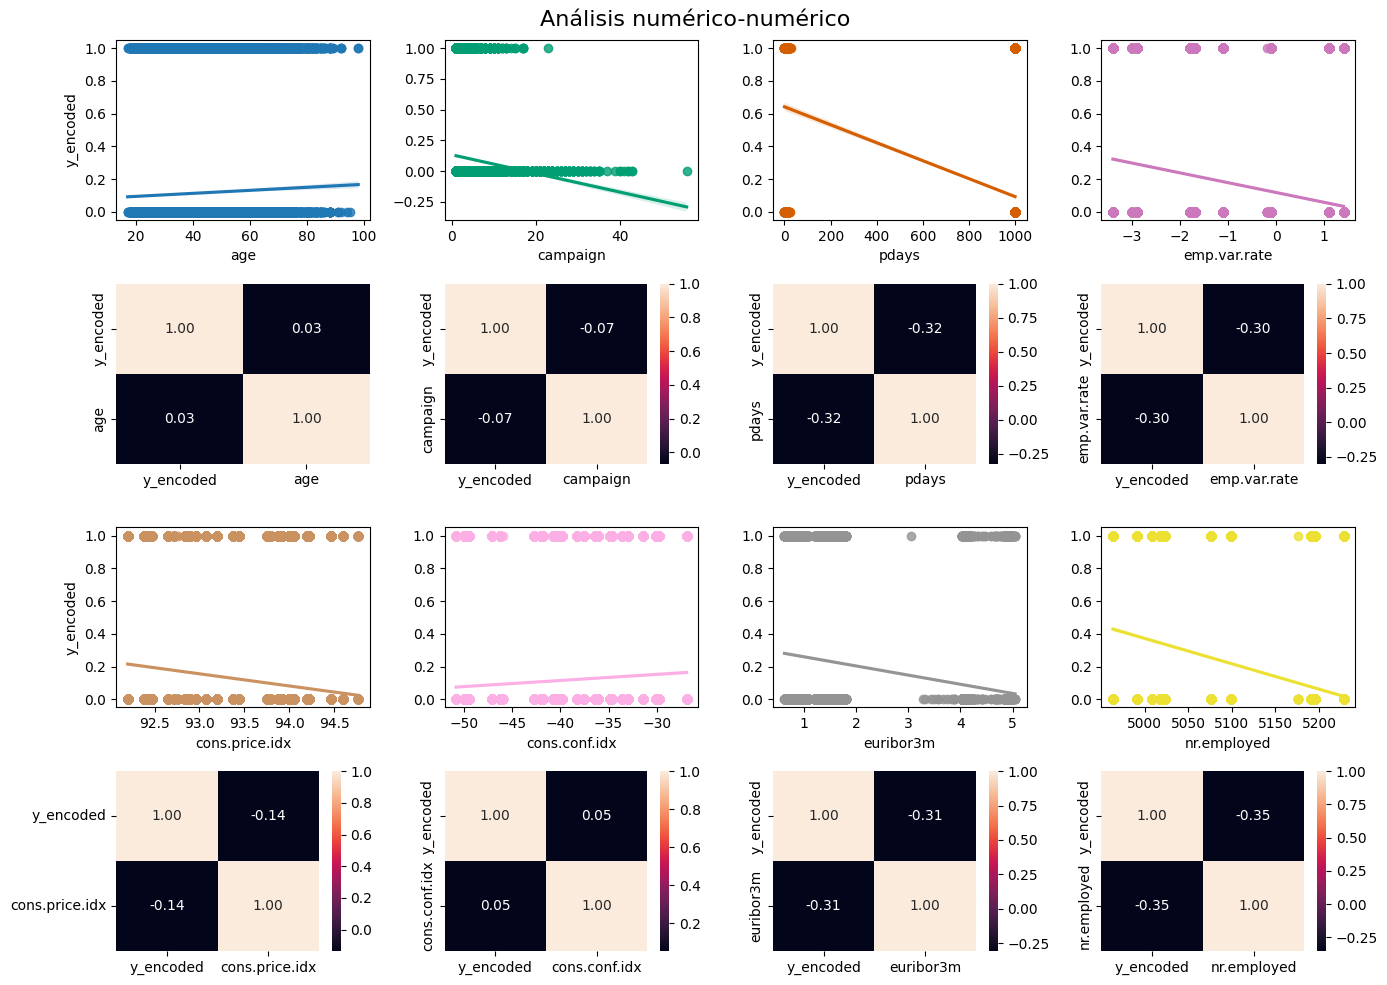

In [26]:
#Analisis de varias variables pt.2

fig, axis = plt.subplots(4, 4, figsize = (14, 10))
fig.suptitle("Análisis numérico-numérico", fontsize=16)

sns.regplot(ax = axis[0, 0], data = df_enc, x = "age", y = "y_encoded")
sns.heatmap(df_enc[["y_encoded", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_enc, x = "campaign", y = "y_encoded", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(df_enc[["y_encoded", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df_enc, x = "pdays", y = "y_encoded", color=sns.color_palette("colorblind")[3]).set(ylabel = None)
sns.heatmap(df_enc[["y_encoded", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[0, 3], data = df_enc, x = "emp.var.rate", y = "y_encoded", color=sns.color_palette("colorblind")[4]).set(ylabel = None)
sns.heatmap(df_enc[["y_encoded", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = df_enc, x = "cons.price.idx", y = "y_encoded", color=sns.color_palette("colorblind")[5])
sns.heatmap(df_enc[["y_encoded", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = df_enc, x = "cons.conf.idx", y = "y_encoded", color=sns.color_palette("colorblind")[6]).set(ylabel = None)
sns.heatmap(df_enc[["y_encoded", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[2, 2], data = df_enc, x = "euribor3m", y = "y_encoded", color=sns.color_palette("colorblind")[7]).set(ylabel = None)
sns.heatmap(df_enc[["y_encoded", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)

sns.regplot(ax = axis[2, 3], data = df_enc, x = "nr.employed", y = "y_encoded", color=sns.color_palette("colorblind")[8]).set(ylabel = None)
sns.heatmap(df_enc[["y_encoded", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3]).set(ylabel = None)

plt.tight_layout()

plt.show()

#Análisis

# 4.2 Numerical - categorical analysis (Correlation Analysis)

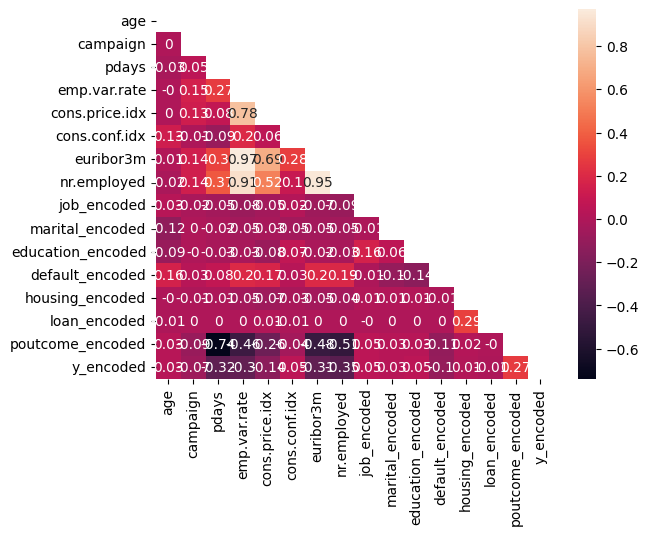

In [27]:
sns.heatmap(df_enc.corr().round(2), annot=True, mask=np.triu(df_enc.corr()))
plt.show()

#Analisis

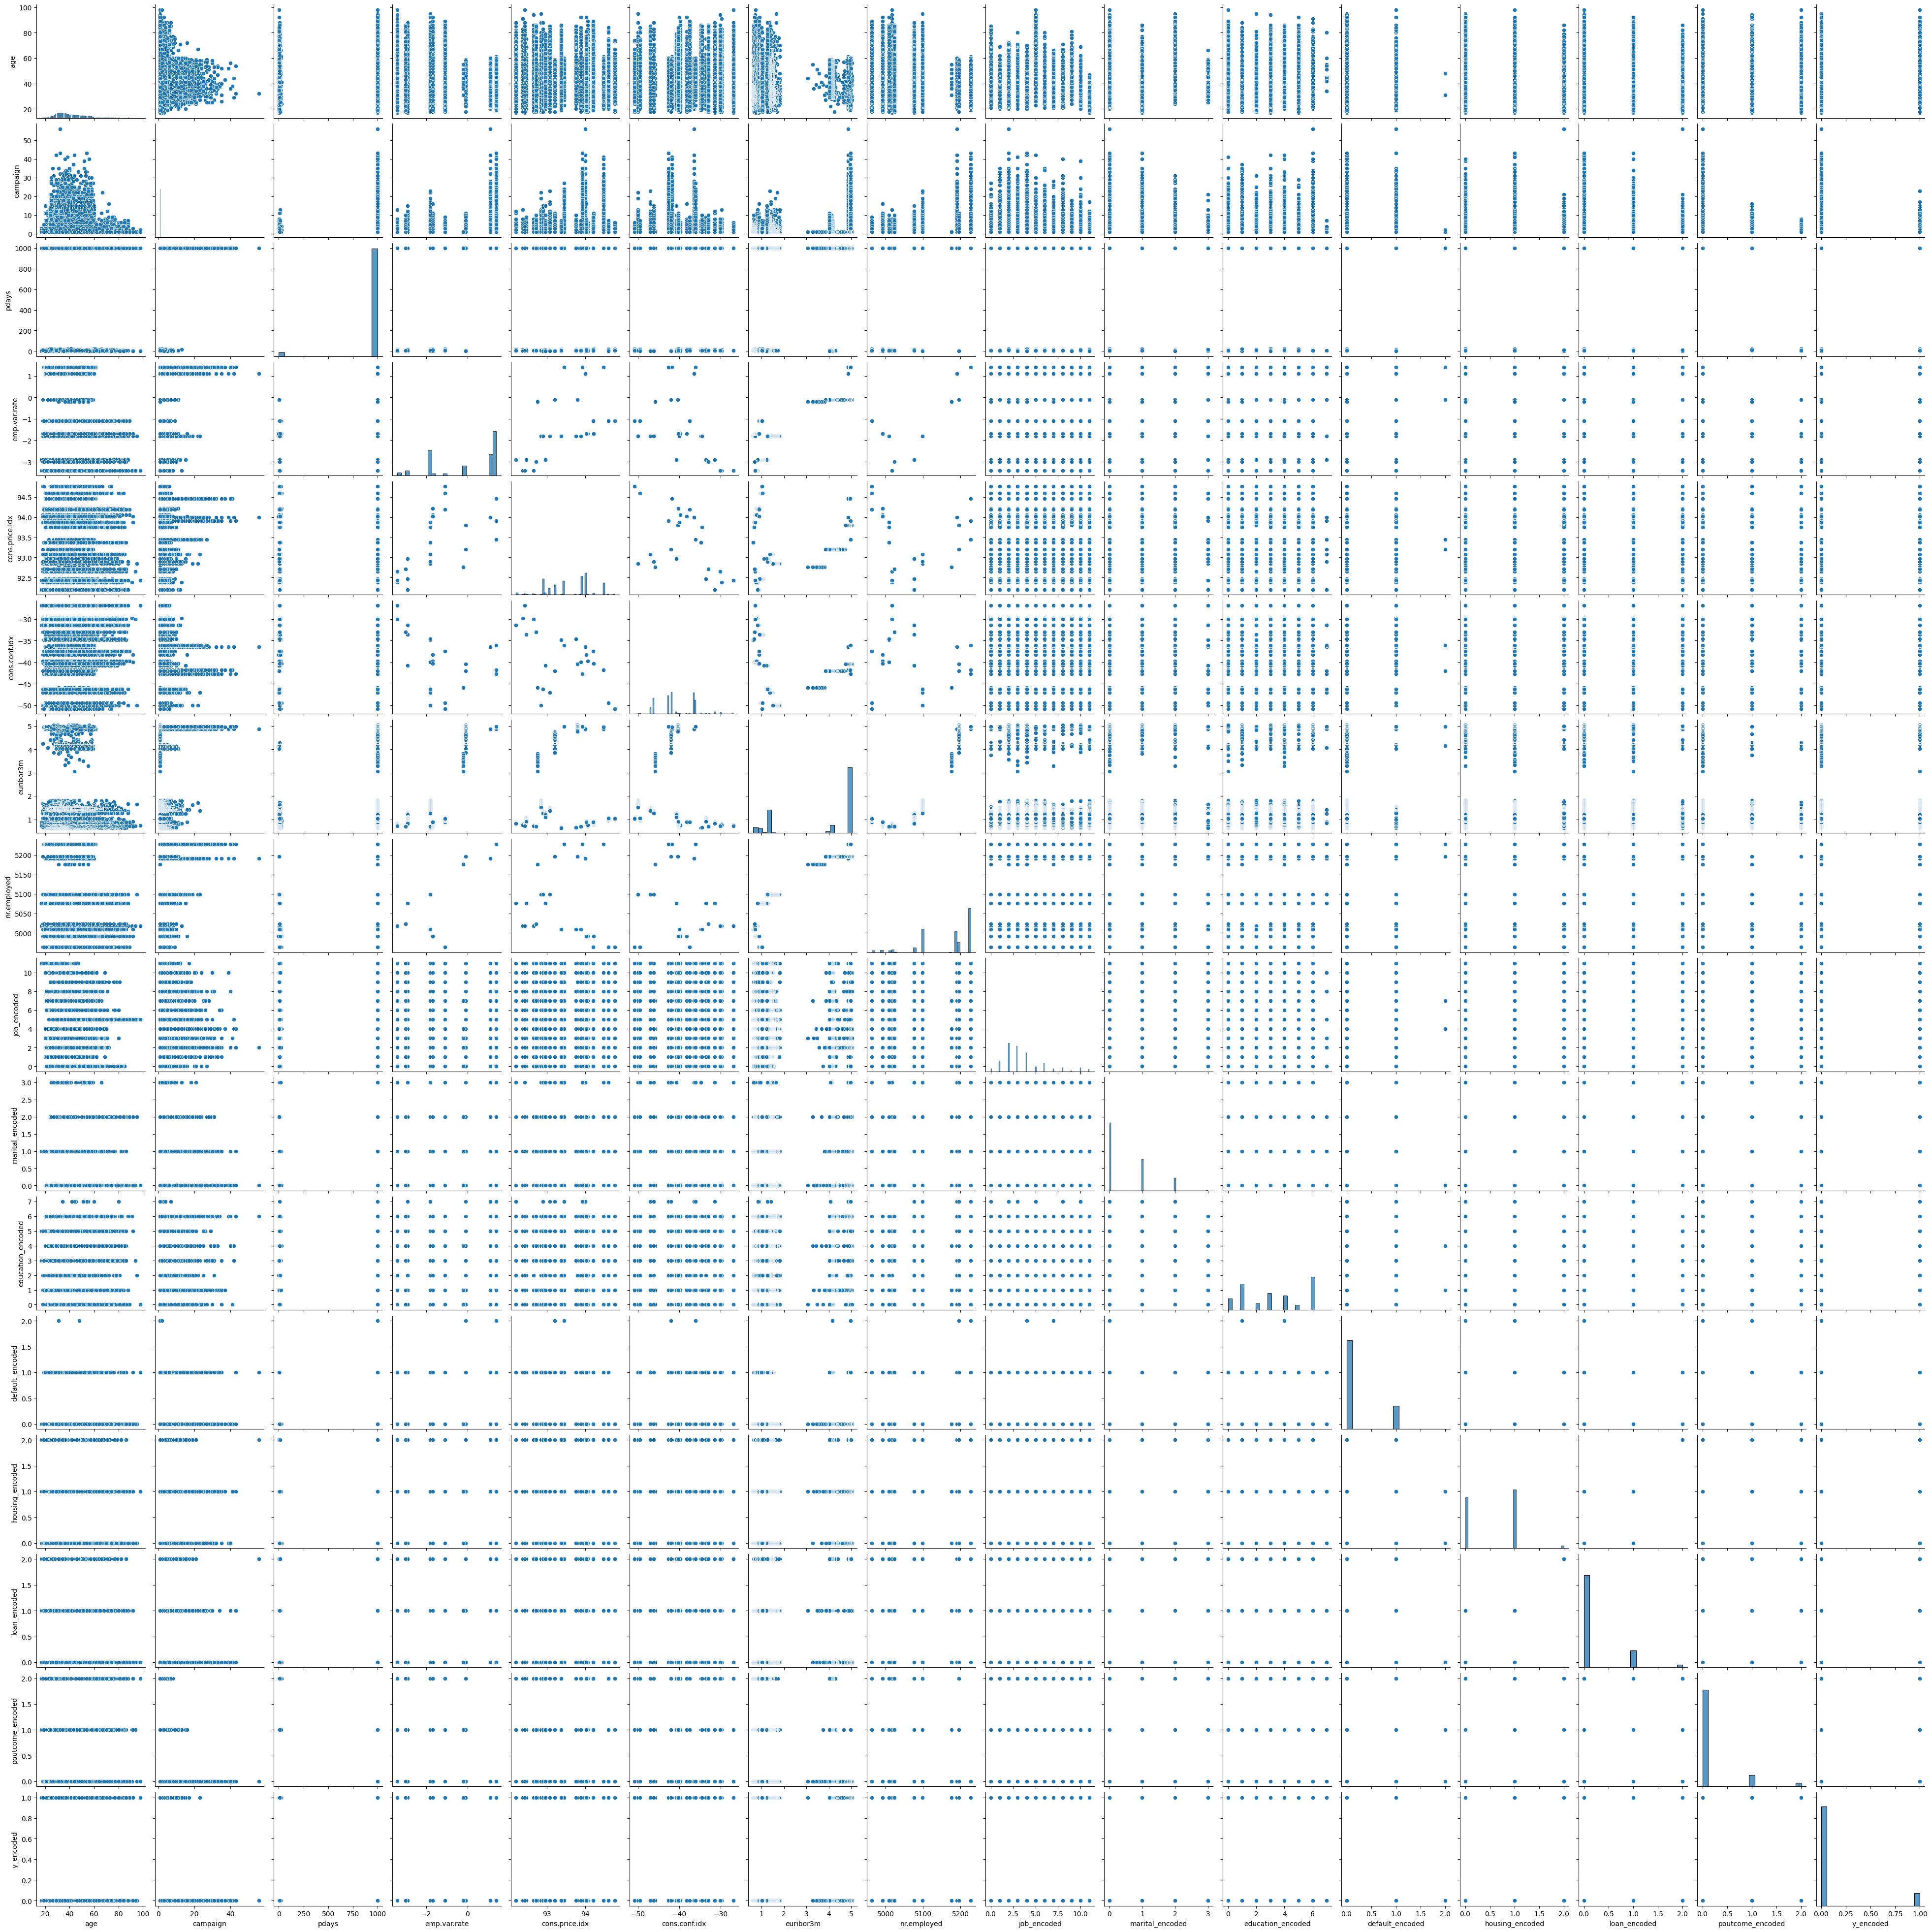

In [28]:
sns.pairplot(data=df_enc)
plt.show()

# 5. Feature Engineering
# 5.1 Outlier Analysis

In [29]:
#Análisis de outliers
df_enc.describe().round(2)

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,poutcome_encoded,y_encoded
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,2.57,962.46,0.08,93.58,-40.50,3.62,5167.03,3.67,0.51,3.28,0.21,0.57,0.20,0.17,0.11
std,10.42,2.77,186.94,1.57,0.58,4.63,1.73,72.25,2.45,0.70,2.19,0.41,0.54,0.46,0.46,0.32
min,17.00,1.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,32.00,1.00,999.00,-1.80,93.08,-42.70,1.34,5099.10,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,38.00,2.00,999.00,1.10,93.75,-41.80,4.86,5191.00,3.00,0.00,3.00,0.00,1.00,0.00,0.00,0.00
75%,47.00,3.00,999.00,1.40,93.99,-36.40,4.96,5228.10,4.00,1.00,6.00,0.00,1.00,0.00,0.00,0.00
max,98.00,56.00,999.00,1.40,94.77,-26.90,5.04,5228.10,11.00,3.00,7.00,2.00,2.00,2.00,2.00,1.00


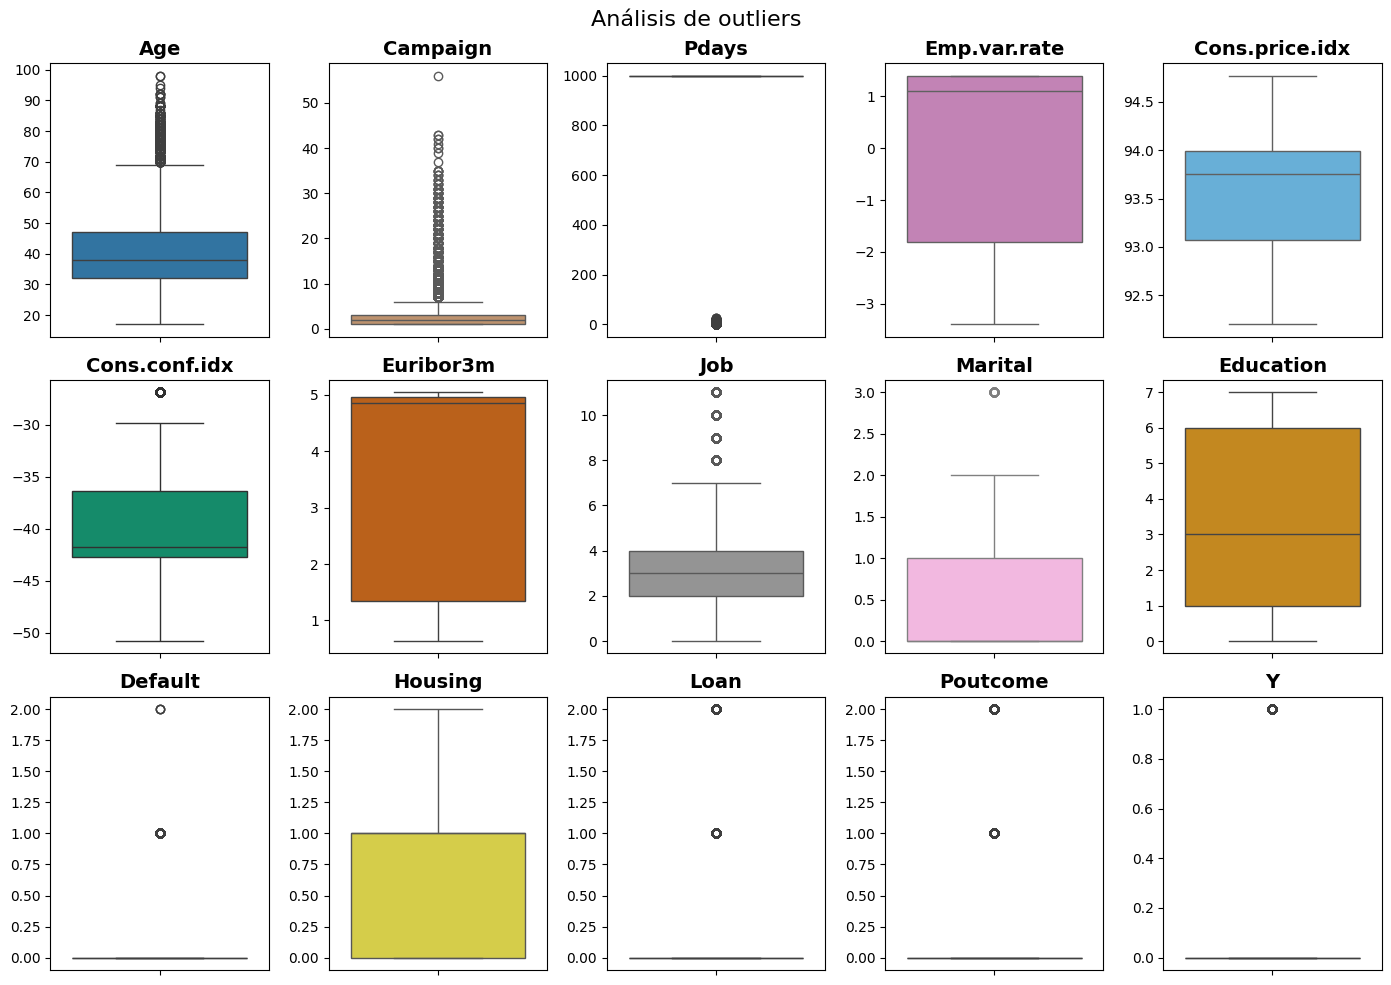

In [30]:
fig, axes = plt.subplots(3, 5, figsize = (14, 10))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = df_enc, y = "age").set_title("Age", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 1], data = df_enc, y = "campaign", color=sns.color_palette("colorblind")[5]).set_title("Campaign", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 2], data = df_enc, y = "pdays").set_title("Pdays", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 3], data = df_enc, y = "emp.var.rate", color=sns.color_palette("colorblind")[4]).set_title("Emp.var.rate", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 4], data = df_enc, y = "cons.price.idx", color=sns.color_palette("colorblind")[9]).set_title("Cons.price.idx", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 0], data = df_enc, y = "cons.conf.idx", color=sns.color_palette("colorblind")[2]).set_title("Cons.conf.idx", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 1], data = df_enc, y = "euribor3m", color=sns.color_palette("colorblind")[3]).set_title("Euribor3m", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 2], data = df_enc, y = "job_encoded", color=sns.color_palette("colorblind")[7]).set_title("Job", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 3], data = df_enc, y = "marital_encoded", color=sns.color_palette("colorblind")[6]).set_title("Marital", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 4], data = df_enc, y = "education_encoded", color=sns.color_palette("colorblind")[1]).set_title("Education", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 0], data = df_enc, y = "default_encoded",).set_title("Default", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 1], data = df_enc, y = "housing_encoded", color=sns.color_palette("colorblind")[8]).set_title("Housing", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 2], data = df_enc, y = "loan_encoded").set_title("Loan", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 3], data = df_enc, y = "poutcome_encoded").set_title("Poutcome", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 4], data = df_enc, y = "y_encoded").set_title("Y", fontsize=14, fontweight='bold')

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)

plt.tight_layout()

plt.show()

We will calculate the outlier limits for age, campaign, and pdays. This data will be used to create a new data frame without outliers (df_enc_no), which we will use to train our model and compare performance to determine the best approach.

In [31]:
#Creamos una copia sin outliers
df_enc_no = df_enc.copy()

In [32]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'./enc/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [33]:
df_enc_no['age'] = remove_outliers(df_enc_no['age'], 'age')
df_enc_no['campaign'] = remove_outliers(df_enc_no['campaign'], 'campaign')
df_enc_no['pdays'] = remove_outliers(df_enc_no['pdays'], 'pdays')

# 5.2 Missing Values

In [34]:
df_enc.isna().sum()

age                  0
campaign             0
pdays                0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
job_encoded          0
marital_encoded      0
education_encoded    0
default_encoded      0
housing_encoded      0
loan_encoded         0
poutcome_encoded     0
y_encoded            0
dtype: int64

# 5.3 Split train/test of both Data Frames

In [35]:
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [36]:
#Dividimos el data frame original
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('y_encoded', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('y_encoded', df_enc_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# 5.4 Normalization

In [37]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'./enc/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [38]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 5.5 Min-Max Scaling

In [39]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'./enc/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [40]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 6. Feature Selection

In [41]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'./enc/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel   

In [42]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 7, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 7, 'without_outliers')

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# 6.1 Applying the filter to the normalized and minmax scaled data frames

In [43]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

# 6.2 Saving the CSV files

In [44]:
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [45]:
# Data frame de entrenamiento
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# Data frame de prueba
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

# Machine Learning
# 1. Decision making: Which is the best dataset?

In [46]:
# Data frames de entrenamiento
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# Data frames de prueba
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [49]:
train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel,
  X_train_with_outliers_norm_sel,
  X_train_without_outliers_norm_sel,
  X_train_with_outliers_minmax_sel,
  X_train_without_outliers_minmax_sel
]
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel,
  X_test_with_outliers_norm_sel,
  X_test_without_outliers_norm_sel,
  X_test_with_outliers_minmax_sel,
  X_test_without_outliers_minmax_sel
]

results = []

for df_index in range(len(train_dfs)):
  model = LogisticRegression()
  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)
  y_train_pred = model.predict(train_df)
  y_test_pred = model.predict(test_dfs[df_index])

  results.append(
    {
        "index": df_index,
        "train_score": accuracy_score(y_train, y_train_pred),
        "test_score": accuracy_score(y_test, y_test_pred)
    }
  )

sorted(results, key = lambda x: x["train_score"], reverse = True)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[{'index': 0,
  'train_score': 0.900728597449909,
  'test_score': 0.8940019426906265},
 {'index': 2,
  'train_score': 0.900728597449909,
  'test_score': 0.8940019426906265},
 {'index': 4,
  'train_score': 0.900728597449909,
  'test_score': 0.8940019426906265},
 {'index': 1,
  'train_score': 0.8967516697024894,
  'test_score': 0.8918164157357941},
 {'index': 5,
  'train_score': 0.8960230722525805,
  'test_score': 0.8901165614375911},
 {'index': 3,
  'train_score': 0.8942622950819672,
  'test_score': 0.8886595434677028}]

# Conclusion: The best datasets are with outlier original, normalizado y escalado